In [1]:
!wget https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip

--2024-08-02 17:04:13--  https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip
Resolving hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)... 16.12.19.2, 52.95.155.40
Connecting to hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)|16.12.19.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131852014 (126M) [application/zip]
Saving to: ‘UTKFace.zip’

UTKFace.zip         100%[===================>] 125.74M  14.1MB/s    in 9.8s    

2024-08-02 17:04:24 (12.8 MB/s) - ‘UTKFace.zip’ saved [131852014/131852014]



In [2]:
!jar xf UTKFace.zip

In [3]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import glob
import os

In [4]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"))
print(image_paths[0])

UTKFace/100_0_0_20170112213500903.jpg.chip.jpg


In [5]:
images = []
ages = []
genders = []
races = []

for path in image_paths:
  filename = path[8:].split("_")
  if len(filename) == 4:
    images.append(np.array(Image.open(path)))
    ages.append(int(filename[0]))
    genders.append(int(filename[1]))
    races.append(int(filename[2]))

In [6]:
dataset_dict = {
    "race_id": {0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Others"},
    "gender_id": {0: "Male", 1: "Female"}
}

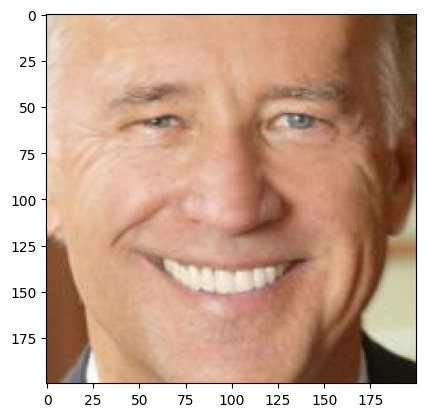

In [7]:
idx = np.random.randint(len(images))

plt.imshow(images[idx])
plt.show()

print(f"Age:{ages[idx]}")
print(f"Gender:{dataset_dict['gender_id'][genders[idx]]}")
print(f"Race:{dataset_dict['race_id'][races[idx]]}")

In [8]:
min_age_value, max_age_value = min(ages), max(ages)
log_age_vales = np.log10(ages)
max_age_log_value = log_age_vales.max()
min_age_log_value = log_age_vales.min()

print(f"Min age value: {min_age_value}")
print(f"Max age value: {max_age_value}")
print(f"Min age log value: {min_age_log_value}")
print(f"Max age log value: {max_age_log_value}")

Age:63
Gender:Male
Race:White
Min age value: 1
Max age value: 116
Min age log value: 0.0
Max age log value: 2.0644579892269186


In [9]:
def get_normalized_age_value(original_age_value):
  return (original_age_value - min_age_value) / (max_age_value - min_age_value)

def get_log_age_value(original_age_value):
  return np.log10(original_age_value) / max-age_log_value

def get_original_age_from_log_value(log_age_value):
  return np.exp(log_age_value) * max_age_log_value

def get_original_age_value(normalized_age_value):
  return normalized_age_value * (max_age_value - min_age_value) + min_age_value

In [10]:
import seaborn as sns
import pandas as pd

d = {"age": ages, "gender": genders, "race": races}
df = pd.DataFrame(data=d)

In [11]:
df.head()

,age,gender,race
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0


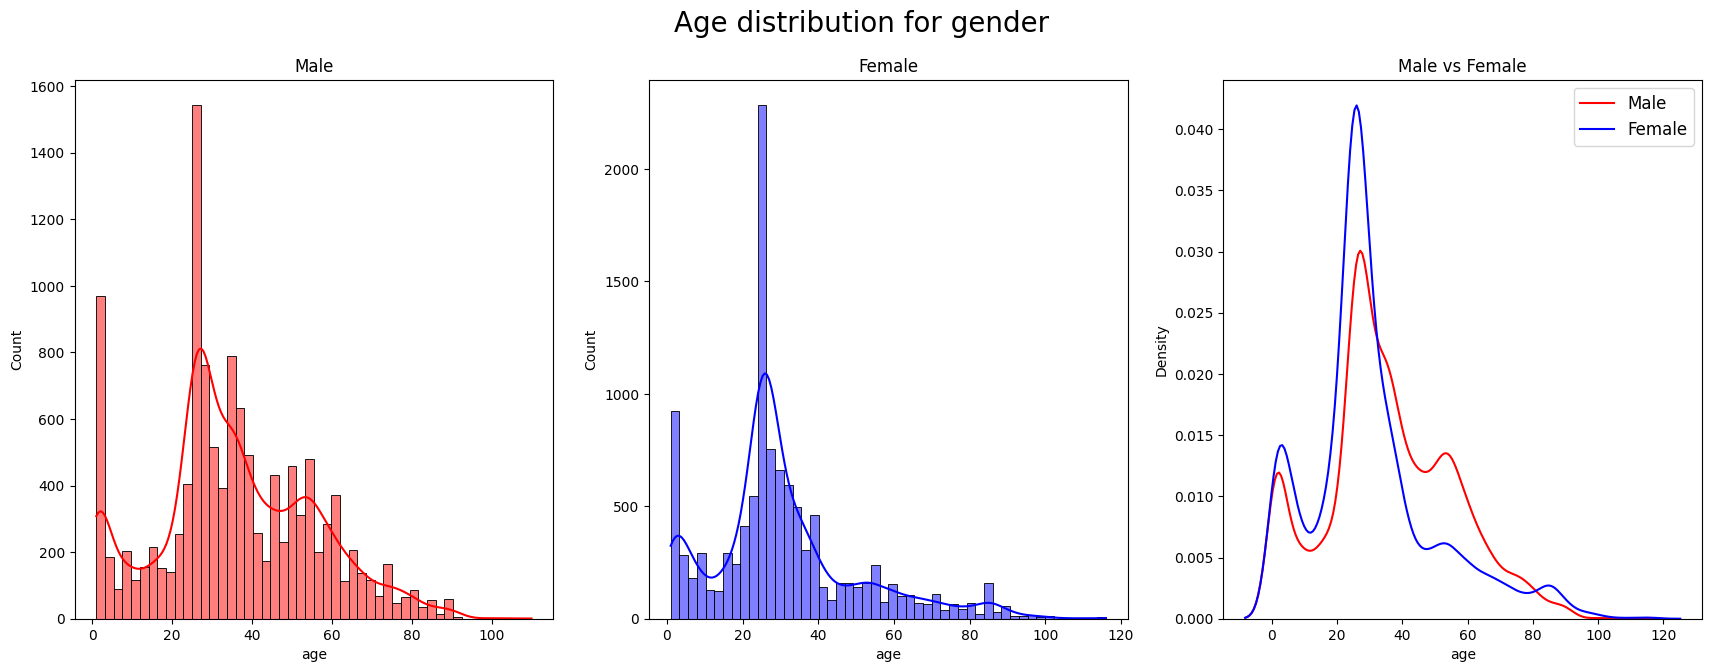

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle("Age distribution for gender", fontsize=20)

df_age_male = df.groupby("gender").get_group(0)
df_age_female = df.groupby("gender").get_group(1)

sns.histplot(data=df_age_male, x="age", kde=True, color="red", ax=ax1, bins=50)
sns.histplot(data=df_age_female, x="age", kde=True, color="blue", ax=ax2, bins=50)

ax1.set_title("Male")
ax2.set_title("Female")

sns.kdeplot(data=df_age_male, x="age", color="red", ax=ax3)
sns.kdeplot(data=df_age_female, x="age", color="blue", ax=ax3)

ax3.legend(["Male", "Female"], fontsize="large")
ax3.title.set_text("Male vs Female")

plt.show()

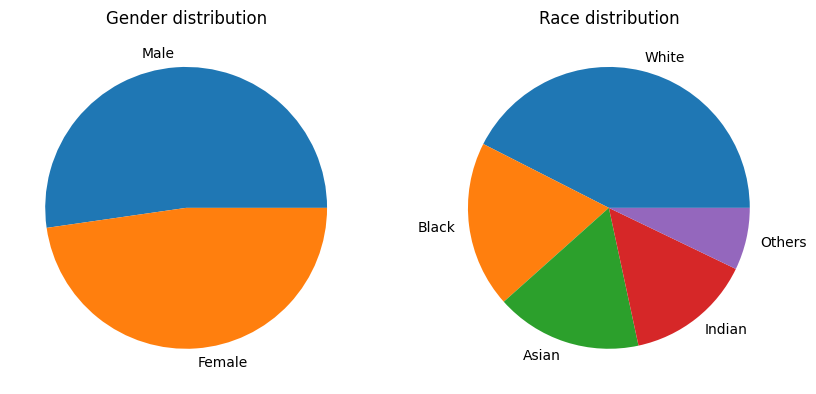

In [13]:
pie, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,6])
df.gender.value_counts().plot(kind='pie', labels=["Male", "Female"], pctdistance=0.5, ax = ax1)
ax1.yaxis.set_visible(False)
ax1.title.set_text('Gender distribution')

df.race.value_counts().plot(kind='pie', labels=["White", "Black", "Asian", "Indian", "Others"], pctdistance=0.5, ax = ax2)
ax2.yaxis.set_visible(False)
ax2.title.set_text('Race distribution')

plt.show()

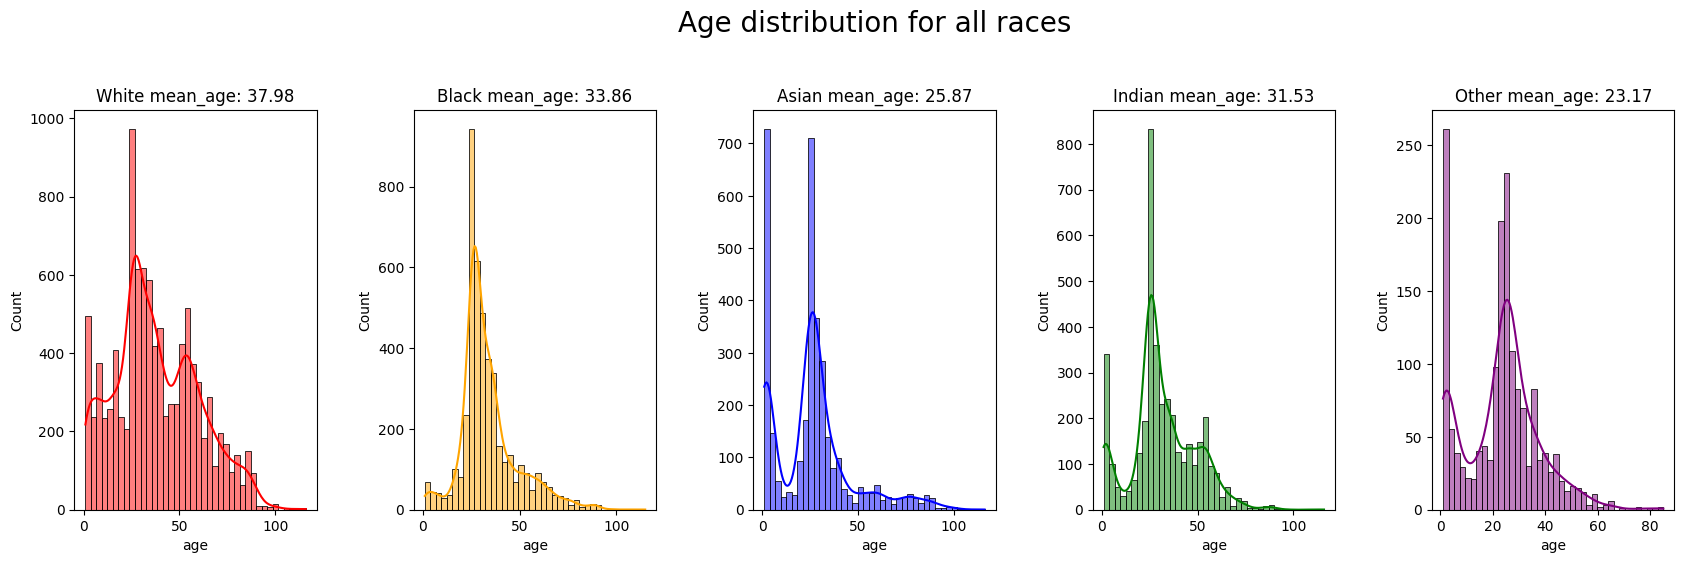

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Age distribution for all races', fontsize=20, y=1.1)
fig.tight_layout()

df_race_white = df.groupby('race').get_group(0)
sns.histplot(data=df_race_white, x="age", kde=True, color="red", ax=ax1, bins=40)
ax1.title.set_text("White mean_age: "+"%.2f" % df_race_white.mean()["age"])

df_race_black = df.groupby('race').get_group(1)
sns.histplot(data=df_race_black, x="age", kde=True, color="orange", ax=ax2, bins=40)
ax2.title.set_text("Black mean_age: "+"%.2f" % df_race_black.mean()["age"])

df_race_asian = df.groupby('race').get_group(2)
sns.histplot(data=df_race_asian, x="age", kde=True, color="blue", ax=ax3, bins=40)
ax3.title.set_text("Asian mean_age: "+"%.2f" % df_race_asian.mean()["age"])

df_race_indian = df.groupby('race').get_group(3)
sns.histplot(data=df_race_indian, x="age", kde=True, color="green", ax=ax4, bins=40)
ax4.title.set_text("Indian mean_age: "+"%.2f" % df_race_indian.mean()["age"])

df_race_other = df.groupby('race').get_group(4)
sns.histplot(data=df_race_other, x="age", kde=True, color="purple", ax=ax5, bins=40)
ax5.title.set_text("Other mean_age: "+"%.2f" % df_race_other.mean()["age"])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

In [15]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
class UTKFace(Dataset):
  def __init__(self, image_paths):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    self.transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(), transforms.Normalize(mean, std)])
    self.image_path = image_paths
    self.images = []
    self.ages = []
    self.gender = []
    self.races = []

    for path in image_paths:
      filename = path[8:].split("_")
      if len(filename) == 4:
        self.images.append(path)
        self.ages.append(int(filename[0]))
        self.gender.append(int(filename[1]))
        self.races.append(int(filename[2]))

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    img = Image.open(self.images[index]).convert("RGB")
    img = self.transform(img)

    age = self.ages[index]
    gender = self.gender[index]
    race = self.races[index]

    sample = {"image": img, "age": age, "gender": gender, "race": race}

    return sample

In [17]:
import torch
from torch.utils.data import random_split, DataLoader

In [18]:
TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
num_train = round(TRAIN_SPLIT*len(image_paths))
num_val = round(VAL_SPLIT*len(image_paths))

print("No of train samples", num_train)
print("No of validation samples", num_val)

No of train samples 16595
No of validation samples 7112


In [20]:
(train_dataset, valid_dataset) = random_split(image_paths, [num_train, num_val], generator=torch.Generator().manual_seed(42))

In [21]:
BATCH_SIZE = 64

train_dataloader = DataLoader(UTKFace(train_dataset), shuffle=True, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(UTKFace(valid_dataset), shuffle=False, batch_size=BATCH_SIZE)

train_size = len(train_dataloader.dataset) // BATCH_SIZE
val_steps = len(val_dataloader.dataset) // BATCH_SIZE

In [22]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)
  plt.show()

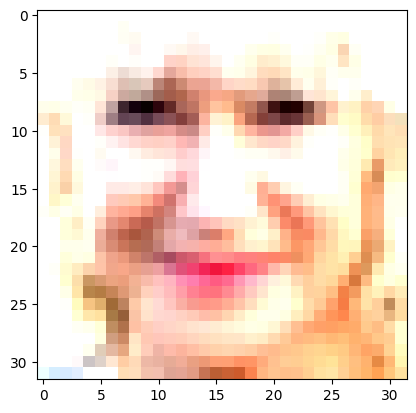

66
0.5652173913043478
Female
White


In [23]:
sample = next(iter(train_dataloader))
imshow(sample["image"][0])
plt.show()

print(sample["age"][0].item())
print(get_normalized_age_value(sample["age"][0].item()))


print(dataset_dict['gender_id'][sample["gender"][0].item()])
print(dataset_dict['race_id'][sample["race"][0].item()])

In [24]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50, resnet101, resnet18, resnet34

In [25]:
from collections import OrderedDict

In [27]:
class hydraNetModified(nn.Module):
  def __init__(self, net):
    super(hydraNetModified, self).__init__()
    self.net = net
    self.n_features = self.net.fc.in_features
    self.net.fc = nn.Identity()
    self.net.fc1 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features, self.n_features)), ('relu1', nn.ReLU()), ('final', nn.Linear(self.n_features, 1))]))
    self.net.fc2 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features, self.n_features)), ('relu1', nn.ReLU()), ('final', nn.Linear(self.n_features, 1))]))
    self.net.fc3 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features, self.n_features)), ('relu1', nn.ReLU()), ('final', nn.Linear(self.n_features, 5))]))

  def forward(self, x):
    age_head = self.net.fc1(self.net(x))
    gender_head = self.net.fc2(self.net(x))
    race_head = self.net.fc3(self.net(x))

    return age_head, gender_head, race_head

In [30]:
net = resnet34(pretrained=True)
model = hydraNetModified(net)
model.to(device=device)

race_loss = nn.CrossEntropyLoss()
gender_loss = nn.BCELoss()
age_loss = nn.L1Loss()

lr = 1e-4
momentum = 0.09
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nv

In [31]:
from torchviz import make_dot

In [32]:
make_dot(model(sample['image'].to(device)), params=dict(list(model.named_parameters()))).render("HydraNet", format="png")

'HydraNet.png'

###Train model

In [33]:
from sklearn.metrics import mean_absolute_error as mean
n_epochs = 100

logger = {"train_loss": list(),
          "validation_loss": list(),
          "train_gender_loss": list(),
          "train_race_loss": list(),
          "train_age_loss": list(),
          "validation_gender_loss": list(),
          "validation_race_loss": list(),
          "validation_age_loss": list()}